## Street Cleaning Data in 5 Years (2018-2022)
For street cleaning, the dataframe contains two codes in 'Violation' column: TRC7.2.22 and T37C, all data after 2018 use TRC7.2.22  
Filter dataframe before cleaning data for the whole dataframe is too large (19M rows of data)

*code description and more info could be found [here](https://www.sfmta.com/sites/default/files/reports-and-documents/2022/10/fy_2023_fees_and_fines_effective_7.1.22_1.pdf)*

Data as of Nov. 22, 2022

### Import Data

In [4]:
# Import pandas and altair

import pandas as pd
import altair as alt
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [5]:
# Import citation_st_cleaning_5yr.csv
st_cleaning_5yr = pd.read_csv('citation_st_cleaning_5yr.csv',
                              dtype={'Citation Number': object} ,
                              parse_dates=['Citation Issued DateTime'])

In [6]:
st_cleaning_5yr

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,949367440,2022-03-23 02:33:00,TRC7.2.22,STR CLEAN,720 TURK ST,CA,8U09234,84.0,11/16/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
1,949375335,2022-03-24 09:30:00,TRC7.2.22,STR CLEAN,19 RIVAS AVE,CA,8GOA162,84.0,11/16/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2,949395613,2022-03-21 13:05:00,TRC7.2.22,STR CLEAN,1405 BAKER ST,CA,5JZT981,84.0,11/16/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
3,949411481,2022-03-29 00:15:00,TRC7.2.22,STR CLEAN,420 NATOMA ST,CA,8DEJ983,84.0,11/16/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
4,949412855,2022-03-22 12:25:00,TRC7.2.22,STR CLEAN,717 WALLER ST,CA,6GOF707,84.0,11/16/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376886,957009465,2022-11-08 07:24:00,TRC7.2.22,STR CLEAN,6220 GEARY BLVD,CA,7GWE932,87.0,11/15/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2376887,957033033,2022-11-09 09:18:00,TRC7.2.22,STR CLEAN,2100 LINCOLN WAY,CA,8MXY663,87.0,11/15/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2376888,957011543,2022-11-08 09:05:00,TRC7.2.22,STR CLEAN,315 FUNSTON AVE,CA,8UXY385,87.0,11/19/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2376889,957032403,2022-11-08 08:52:00,TRC7.2.22,STR CLEAN,2501 25TH AVE,CA,7TRV758,87.0,11/20/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
st_cleaning_5yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376891 entries, 0 to 2376890
Data columns (total 15 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Citation Number               object        
 1   Citation Issued DateTime      datetime64[ns]
 2   Violation                     object        
 3   Violation Description         object        
 4   Citation Location             object        
 5   Vehicle Plate State           object        
 6   Vehicle Plate                 object        
 7   Fine Amount                   float64       
 8   Date Added                    object        
 9   geom                          object        
 10  Neighborhoods                 float64       
 11  SF Find Neighborhoods         float64       
 12  Current Police Districts      float64       
 13  Current Supervisor Districts  float64       
 14  Analysis Neighborhoods        float64       
dtypes: datetime64[ns](1), float64(6)

### Analysis and Visualizing

In [8]:
# Extract year from 'Citation Issued DateTime'
st_cleaning_5yr['Issued Year'] = pd.DatetimeIndex(st_cleaning_5yr['Citation Issued DateTime']).year

In [9]:
# Check new column created, sorted by issued date and reset the index
st_cleaning_5yr.sort_values(['Citation Issued DateTime']).reset_index(drop=True)

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Issued Year
0,892597786,2018-01-02 00:03:00,TRC7.2.22,STR CLEAN,7 04TH ST,CA,8AGE461,73.0,10/15/2021 12:00:00 AM,POINT (-122.46585481399995 37.788244665000036),4.0,4.0,8.0,6.0,11.0,2018
1,892536632,2018-01-02 00:08:00,TRC7.2.22,STR CLEAN,333 08TH ST,CA,7XSH956,73.0,09/24/2018 12:00:00 AM,POINT (-122.03654390799994 38.24835797800006),NaN,NaN,NaN,NaN,NaN,2018
2,892597790,2018-01-02 00:08:00,TRC7.2.22,STR CLEAN,869 FOLSOM ST,CA,6TZE100,73.0,04/30/2020 12:00:00 AM,POINT (-122.40263889499994 37.78079616600007),32.0,32.0,1.0,10.0,34.0,2018
3,892597801,2018-01-02 00:09:00,TRC7.2.22,STR CLEAN,839 FOLSOM ST,CA,7XBP248,73.0,06/16/2018 12:00:00 AM,POINT (-122.40196506399997 37.781329424000035),32.0,32.0,1.0,10.0,34.0,2018
4,892257855,2018-01-02 00:10:00,TRC7.2.22,STR CLEAN,225 TOWNSEND ST,CA,6CWY869,73.0,04/12/2021 12:00:00 AM,POINT (-122.39345305299997 37.77822802800006),34.0,34.0,1.0,10.0,4.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376886,957285862,2022-11-16 12:44:00,TRC7.2.22,STR CLEAN,1601 BRODERICK STREET,CA,6XCJ079,87.0,11/22/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2022
2376887,957212222,2022-11-16 12:45:00,TRC7.2.22,STR CLEAN,1501 BRODERICK ST,CA,7JUR685,87.0,11/22/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2022
2376888,957148264,2022-11-16 13:12:00,TRC7.2.22,STR CLEAN,1160 REVERE AVENUE,CA,5P65273,87.0,11/22/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2022
2376889,957240712,2022-11-16 13:18:00,TRC7.2.22,STR CLEAN,2444 15TH AVE,CO,FLT388S,87.0,11/22/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2022


#### How many street cleaning citations were given each year from 2018-2022?
Very much similar each year (year 2022 is not completed yet)  
The latest data recorded was Nov. 17, 2022

In [10]:
# Count citation numbers by year (note: 'Issued Year' here is not a column)
st_cleaning_year_count = st_cleaning_5yr.groupby(['Issued Year']).count()
st_cleaning_year_count = st_cleaning_year_count[['Citation Number']].copy()
st_cleaning_year_count = st_cleaning_year_count.reset_index()
st_cleaning_year_count

,Issued Year,Citation Number
0,2018,518231
1,2019,491695
2,2020,392720
3,2021,533579
4,2022,440666


In [11]:
# Count average citation given per year (mean)
st_cleaning_year_count['Citation Number'].mean(axis=0) ## note: the mean got influneced by 2020 lockdown and incomplete 2022

475378.2

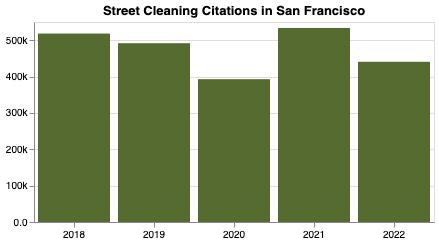

In [12]:
# Visualize the table
alt.Chart(
    st_cleaning_year_count,
    width=400,
    height=200
).mark_bar(color='darkolivegreen').encode(
    x=alt.X('Issued Year:O', axis=alt.Axis(labelAngle=0), title=''),
    y=alt.Y('Citation Number', axis=alt.Axis(format='.2s'), title='')
).properties(
    title='Street Cleaning Citations in San Francisco'
)

#### Take closer look at citation count each month

In [13]:
# Citation count by month (the date marks for each month)
st_cleaning_month_count = st_cleaning_5yr.groupby(pd.Grouper(key='Citation Issued DateTime', axis=0, freq='MS', origin='start')).count()[['Citation Number']].reset_index() ## still datetime
# st_cleaning_month_count['Issued Month'] = st_cleaning_month_count['Citation Issued DateTime'].dt.strftime('%b, %Y') ## this change dtype to 'object'
st_cleaning_month_count

,Citation Issued DateTime,Citation Number
0,2018-01-01,41850
1,2018-02-01,41716
2,2018-03-01,45534
3,2018-04-01,41777
4,2018-05-01,45374
5,2018-06-01,43792
6,2018-07-01,41732
7,2018-08-01,47519
8,2018-09-01,41123
9,2018-10-01,41943


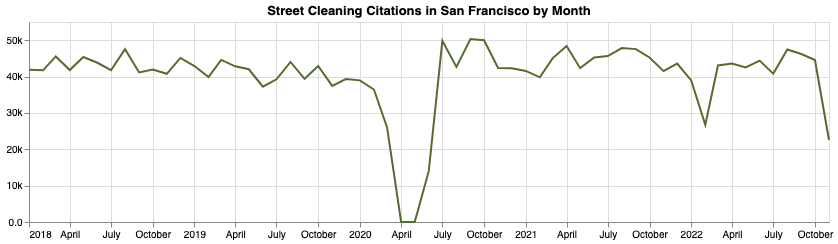

In [17]:
# Visualize the table (line chart has better view for this chart)
alt.Chart(
    st_cleaning_month_count,
    width=800,
    height=200
).mark_line(color='darkolivegreen').encode(
    x=alt.X('Citation Issued DateTime', axis=alt.Axis(labelAngle=0), title=''),
    y=alt.Y('Citation Number', axis=alt.Axis(format='.2s') , title='')
).properties(
    title='Street Cleaning Citations in San Francisco by Month'
)

*Note1: Citations were given pretty much similar each month, except April and May, 2020 (the start of lockdown during pandemic) unitl June 15, 2020*  
*Note2: Last data recorded was November 15th.*  
*Reference: [Mayor London Breed announced no ticket for street sweeping](https://twitter.com/LondonBreed/status/1240035183580966912) and [As the city gradually reopens, mechanical street sweeping enforcement is set to resume](https://www.sfmta.com/blog/city-gradually-reopens-mechanical-street-sweeping-enforcement-set-resume)*

#### What about total fine each year for street cleaning violations?

According to SFMTA, street cleaning fine varies from years:  
2022.07.01 `$87.0`  
2021.07.01 `$85.0`  
2021.01.01 `$83.0`  
2019.07.01 `$79.0`  
2018.07.01 `$76.0`  
2018.01.01 `$73.0`  
But there are more values rather than the ones above. According to SFMTA, late fee might apply.

In [18]:
# See different values in 'Fine Amount' column
st_cleaning_5yr['Fine Amount'].value_counts()

79.0     634594
76.0     507684
85.0     277785
83.0     265577
73.0     260215
84.0     230913
87.0     199780
0.0         335
25.0          2
110.0         2
189.0         2
272.0         1
71.0          1
Name: Fine Amount, dtype: int64

In [58]:
# See each 'unusual' amount of fee
st_cleaning_5yr[st_cleaning_5yr['Fine Amount'] == 71.0]

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Issued Year
2187603,1004022526,2018-04-17 07:19:00,TRC7.2.22,STR CLEAN,900 BAYSHORE,CA,7SRJ296,71.0,05/11/2017 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [59]:
st_cleaning_5yr[st_cleaning_5yr['Fine Amount'] == 272.0]

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Issued Year
1806051,PD34895350,2019-07-16 07:31:00,TRC7.2.22,STR CLEAN,400 WINSTON,CA,5UNS141,272.0,08/08/2019 12:00:00 AM,POINT (-122.47672802899996 37.72913298900005),41.0,41.0,10.0,8.0,16.0,2019


In [60]:
st_cleaning_5yr[st_cleaning_5yr['Fine Amount'] == 189.0]

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Issued Year
1315981,1005904281,2020-01-14 07:18:00,TRC7.2.22,STR CLEAN,1501 BAYSHOIRE,CA,6THW860,189.0,03/27/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2020
1644677,1005979365,2020-01-27 15:04:00,TRC7.2.22,STR CLEAN,669 MISSION,CA,5AVE147,189.0,04/20/2021 12:00:00 AM,POINT (-122.40131583199997 37.78670342300006),32.0,32.0,1.0,10.0,8.0,2020


In [61]:
st_cleaning_5yr[st_cleaning_5yr['Fine Amount'] == 110.0]

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Issued Year
462302,939940293,2021-06-24 08:35:00,TRC7.2.22,STR CLEAN,494 BARTLETT ST,CA,7RRJ853,110.0,07/18/2021 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2021
1020157,936228090,2021-02-09 02:14:00,TRC7.2.22,STR CLEAN,1792 ARMSTRONG AVE,CA,MNN053,110.0,08/29/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2021


In [62]:
st_cleaning_5yr[st_cleaning_5yr['Fine Amount'] == 25.0]

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Issued Year
353623,943076525,2021-09-07 09:48:00,TRC7.2.22,STR CLEAN,1117 FULTON STREET,MA,1SEA19,25.0,09/13/2021 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2021
369802,943076514,2021-09-07 09:47:00,TRC7.2.22,STR CLEAN,1117 FULTON STREET,CA,8VFF223,25.0,09/14/2021 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2021


In [27]:
st_cleaning_5yr[st_cleaning_5yr['Fine Amount'] == 0.0].sort_values(['Citation Issued DateTime'])

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Issued Year
1196577,920109805,2018-06-13 06:43:00,TRC7.2.22,STR CLEAN,46 03RD AVE,CA,4FGD678,0.0,06/16/2018 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2018
1194049,920109820,2018-06-13 06:55:00,TRC7.2.22,STR CLEAN,NaN,CA,655TTU,0.0,06/16/2018 12:00:00 AM,POINT (-122.41963999999996 37.777120000000025),21.0,21.0,4.0,10.0,36.0,2018
1195948,920109831,2018-06-13 07:04:00,TRC7.2.22,STR CLEAN,NaN,CA,5YYG,0.0,06/16/2018 12:00:00 AM,POINT (-122.41963999999996 37.777120000000025),21.0,21.0,4.0,10.0,36.0,2018
1200029,920114230,2018-06-20 01:13:00,TRC7.2.22,STR CLEAN,505 MISSION ST,CA,A123TYU,0.0,06/22/2018 12:00:00 AM,POINT (-122.39764435799998 37.78963746000005),32.0,32.0,1.0,10.0,8.0,2018
1201292,920112955,2018-06-20 02:22:00,TRC7.2.22,STR CLEAN,NaN,CA,8ARF698,0.0,06/23/2018 12:00:00 AM,POINT (-122.41963999999996 37.777120000000025),21.0,21.0,4.0,10.0,36.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298640,956077172,2022-10-17 01:07:00,TRC7.2.22,STR CLEAN,101 9TH STREET,CA,6GIH876,0.0,10/22/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2022
2298638,956069774,2022-10-17 02:14:00,TRC7.2.22,STR CLEAN,MISSION ST,CA,62376U2,0.0,10/22/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2022
2298299,955499731,2022-10-17 04:03:00,TRC7.2.22,STR CLEAN,HARRISON ST,CA,8YZS761,0.0,10/22/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2022
2298733,956069855,2022-10-17 04:12:00,TRC7.2.22,STR CLEAN,2074 MISSION ST,CA,8LFT084,0.0,10/22/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [66]:
st_cleaning_5yr[(st_cleaning_5yr['Citation Issued DateTime'] >= '2020-03-17') & 
                (st_cleaning_5yr['Fine Amount'] == 0.0)].sort_values(
                ['Citation Issued DateTime']).head()

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Issued Year
2183132,929042796,2020-06-22 23:08:00,TRC7.2.22,STR CLEAN,NaN,DD,20201B4,0.0,07/24/2020 12:00:00 AM,POINT (-122.41963999999996 37.777120000000025),21.0,21.0,4.0,10.0,36.0,2020
2168394,930182455,2020-07-13 01:08:00,TRC7.2.22,STR CLEAN,568 BEALE ST,DD,20201B5,0.0,07/14/2020 12:00:00 AM,POINT (-122.38893817699994 37.785559085000045),31.0,31.0,1.0,10.0,8.0,2020
1828215,930186062,2020-07-21 02:26:00,TRC7.2.22,STR CLEAN,602 TOWNSEND STREET,CA,46173T2,0.0,07/24/2020 12:00:00 AM,POINT (-122.40236730899994 37.77133664300004),33.0,33.0,1.0,10.0,34.0,2020
141417,931535592,2020-09-09 00:15:00,TRC7.2.22,STR CLEAN,296 TOWNSEND STREET,CA,7SWN510,0.0,09/17/2020 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2020
141203,931391801,2020-09-09 01:01:00,TRC7.2.22,STR CLEAN,476 MAIN ST,CA,7NYH248,0.0,09/17/2020 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2020


In [75]:
st_cleaning_5yr[
    (st_cleaning_5yr['Citation Issued DateTime'] >= '2020-03-17') & 
    (st_cleaning_5yr['Citation Issued DateTime'] < '2020-06-16')
].sort_values(
    ['Citation Issued DateTime']
).head()

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Issued Year
1798387,929285361,2020-03-17 00:01:00,TRC7.2.22,STR CLEAN,450 CLEMENTINA ST,CA,6ZME824,79.0,07/28/2020 12:00:00 AM,POINT (-122.40518102499999 37.77992698700007),32.0,32.0,1.0,10.0,34.0,2020
2100778,929285372,2020-03-17 00:02:00,TRC7.2.22,STR CLEAN,450 CLEMENTINA ST,CA,57336C2,79.0,07/28/2020 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2020
2099182,929285383,2020-03-17 00:05:00,TRC7.2.22,STR CLEAN,455 NATOMA ST,CA,8EUD958,79.0,07/28/2020 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2020
1792945,929395434,2020-03-17 00:05:00,TRC7.2.22,STR CLEAN,595 07TH ST,CA,30130C1,79.0,07/28/2020 12:00:00 AM,POINT (-122.33281512199994 37.578692457000045),NaN,NaN,NaN,NaN,NaN,2020
2097805,929285394,2020-03-17 00:06:00,TRC7.2.22,STR CLEAN,445 NATOMA ST,CA,5FBY631,79.0,07/28/2020 12:00:00 AM,POINT (-122.40648198099996 37.780916010000055),32.0,32.0,1.0,10.0,34.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221334,1005996202,2020-03-17 14:05:00,TRC7.2.22,STR CLEAN,2018 MARIPOSA ST,CA,6XZW042,79.0,09/21/2020 12:00:00 AM,POINT (-122.40385400199995 37.76362301200004),54.0,54.0,1.0,9.0,26.0,2020
17977,922837101,2020-03-25 14:29:00,TRC7.2.22,STR CLEAN,5455 03RD ST,CA,TESTINT,79.0,03/10/2021 12:00:00 AM,POINT (-122.41963999999996 37.777120000000025),21.0,21.0,4.0,10.0,36.0,2020
1187800,1006048385,2020-04-28 08:30:00,TRC7.2.22,STR CLEAN,10 BRUSNAN,CA,7T72157,79.0,09/02/2020 12:00:00 AM,POINT (-122.422400891 37.768835685000056),37.0,37.0,3.0,5.0,20.0,2020
2187478,920607306,2020-05-19 09:16:00,TRC7.2.22,STR CLEAN,252 02ND ST,CA,558A44,79.0,07/27/2020 12:00:00 AM,POINT (-122.33751703099995 37.57535821500005),NaN,NaN,NaN,NaN,NaN,2020


In [50]:
st_cleaning_5yr['Analysis Neighborhoods'].isna().sum()

1445655

In [ ]:
st_cleaning_5yr[st_cleaning_5yr['Analysis Neighborhoods']

In [53]:
st_cleaning_5yr[st_cleaning_5yr['Analysis Neighborhoods'].isna()].sort_values(['Citation Issued DateTime']).head()

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Issued Year
1808498,892536632,2018-01-02 00:08:00,TRC7.2.22,STR CLEAN,333 08TH ST,CA,7XSH956,73.0,09/24/2018 12:00:00 AM,POINT (-122.03654390799994 38.24835797800006),NaN,NaN,NaN,NaN,NaN,2018
1742975,892597812,2018-01-02 00:11:00,TRC7.2.22,STR CLEAN,755 FOLSOM ST,CA,7EJP872,73.0,02/03/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2018
1756962,892597856,2018-01-02 00:22:00,TRC7.2.22,STR CLEAN,233 02ND ST,CA,5DAK513,73.0,01/31/2018 12:00:00 AM,POINT (-122.33781334999998 37.575313133000066),NaN,NaN,NaN,NaN,NaN,2018
1804865,892597882,2018-01-02 00:23:00,TRC7.2.22,STR CLEAN,231 02ND ST,WA,BFS7884,73.0,03/18/2018 12:00:00 AM,POINT (-122.33784344199995 37.57529217600006),NaN,NaN,NaN,NaN,NaN,2018
2286456,892597926,2018-01-02 00:31:00,TRC7.2.22,STR CLEAN,329 02ND ST,CA,7ZMS084,73.0,11/21/2022 12:00:00 AM,POINT (-122.03651451399998 38.24837362300008),NaN,NaN,NaN,NaN,NaN,2018


#### What about total fine each month?

In [15]:
# Reference: drop rows or columns: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
# syntax: DataFrame.drop(labels=None, *, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

#### Hotspots for street cleaning citations?
Interestingly, there are 5 locations on the Mission St., 3 on Taylor St., and 2 on Jones St.  
If we put the locations on the map, 5 of the locations are in the Tenderloin district, 4 in SOMA district, and 1 in Financial district, but all locations are close to each other.

In [57]:
# Top 10 hotspots
st_cleaning_5yr['Citation Location'].value_counts().nlargest(10)

1190 MISSION ST    459
111 TAYLOR ST      339
540 JONES ST       327
1188 MISSION ST    287
814 MISSION ST     282
555 MISSION ST     270
556 JONES ST       262
520 TAYLOR ST      251
1018 MISSION ST    249
501 TAYLOR ST      242
Name: Citation Location, dtype: int64

### Reference
1. [New report shows these are worst places to park in San Francisco](https://abc7news.com/san-francisco-parking-violations-most-tickets-worst-places/12158961/)
2. [Don’t Want a Ticket? These Are the Worst Places in SF to Park](https://sfstandard.com/research-data/worst-places-park-san-francisco-parking-ticket/)
3. [‘SFMTA will not ticket for street sweeping,’ says mayor](https://sf.curbed.com/2020/3/17/21183307/sf-shelter-place-parking-street-sweeping-coronavirus)
4. [A study on San Francisco Parking Tickets](https://www.spotangels.com/blog/sf-parking-tickets-most-ticketed-areas-in-sf/)
5. [Here are the answers to your San Francisco street sweeping questions](https://www.sfgate.com/local-donotuse/article/Here-are-answers-to-your-SF-street-sweeping-SFMTA-14056031.php)
6. [As the city gradually reopens, mechanical street sweeping enforcement is set to resume](https://www.sfmta.com/blog/city-gradually-reopens-mechanical-street-sweeping-enforcement-set-resume)

### Contact
Stephen Chun, Deputy Spokesperson, Communications, Marketing & Outreach Division  
Email: Stephen.Chun@sfmta.com